In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loaduing all the files
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("data/sampleSubmission.csv")

In [3]:
print("Shape of features data",features.shape)
features.head()

Shape of features data (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
print("Shape of Stores data", stores.shape)
stores.head()


Shape of Stores data (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
print("Shape of train data",train.shape)
train.head()

Shape of train data (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
#checking no of null values in column "Markdown1-5" in the features data

print(features['MarkDown1'].isnull().sum())
print(features['MarkDown2'].isnull().sum())
print(features['MarkDown3'].isnull().sum())
print(features['MarkDown4'].isnull().sum())
print(features['MarkDown5'].isnull().sum())

4158
5269
4577
4726
4140


In [7]:
#merigng all the three datasets into one
data_train = train.merge(stores, how='left').merge(features, how='left')
print(data_train.shape)
data_train.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [8]:
data_test = test.merge(stores, how=  'left').merge(features, how = 'left')
print(data_test.shape)
data_test.head()

(115064, 15)


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [9]:
data_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [10]:
#checking for number of unique stores and number of unique departments
print("The number of unique departments in the data is:", len(data_train.Dept.unique()))
print("The number of unique stores in the data is:", len(data_train.Store.unique()))

The number of unique departments in the data is: 81
The number of unique stores in the data is: 45


In [11]:
#adding new features into the data
#Here we extract features from the column "Date". These features are
#Week : Depicting the week of the year out of the 52 weeks we get in a year.
#Month: Depicting the month of the year.
  

In [12]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_train['Week'] = data_train['Date'].dt.week
data_train['Month'] = pd.DatetimeIndex(data_train['Date']).month 
data_train['Year'] = data_train['Date'].dt.year



data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test['Week'] = data_test['Date'].dt.week
data_test['Month'] = pd.DatetimeIndex(data_test['Date']).month 
data_test['Year'] = data_test['Date'].dt.year

data_test.head()


C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,44,11,2012
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,45,11,2012
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,46,11,2012
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,47,11,2012
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,48,11,2012


In [13]:
print(data_train.dtypes)
print("*"*100)
print(data_test.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Week                     int64
Month                    int64
Year                     int64
dtype: object
****************************************************************************************************
Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2        

In [14]:
#addition of Haloween
data_train.loc[(data_train['Week']==43), 'IsHoliday'] = True
data_test.loc[(data_test['Week']==43), 'IsHoliday'] = True
#adition of President's Day
data_train.loc[(data_train['Week']==7), 'IsHoliday'] = True
data_test.loc[(data_test['Week'] == 7), 'IsHoliday'] = True
#adddition of US Independence Day
data_train.loc[(data_train['Week'] == 22), 'IsHoliday'] = True
data_test.loc[(data_test['Week'] == 22), 'IsHoliday'] = True
#addition of easter
data_train.loc[(data_train['Year']==2010) & (data_train['Week']==13), 'IsHoliday'] = True
data_train.loc[(data_train['Year']==2011) & (data_train['Week']==16), 'IsHoliday'] = True
data_train.loc[(data_train['Year']==2012) & (data_train['Week']==14), 'IsHoliday'] = True
data_test.loc[(data_test['Year']==2013) & (data_test['Week']==13), 'IsHoliday'] = True


In [15]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,True,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,9,3,2010


In [16]:
data_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,44,11,2012
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,45,11,2012
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,46,11,2012
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,47,11,2012
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,48,11,2012


<AxesSubplot:>

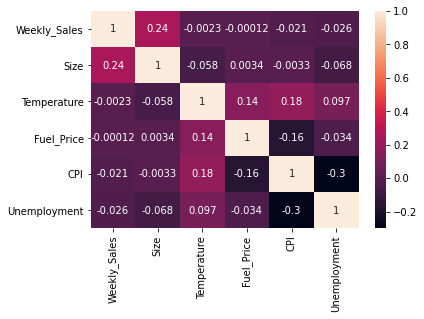

In [17]:
#checking for correlation among the numerical variables:
df_corr = data_train[['Weekly_Sales','Size', 'Temperature','Fuel_Price','CPI','Unemployment']]
mat_corr = df_corr.corr()
sns.heatmap(mat_corr,annot=True)


<h4>Weekly Sales has doesn't have much correlation with any of the other numerical features. Although we can see a correlation with the feature size</h4>

In [40]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

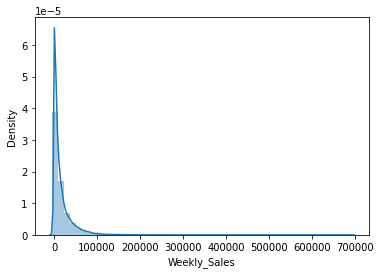

In [17]:
#looking at the weekly Sales distribution
sns.distplot(data_train['Weekly_Sales'])

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

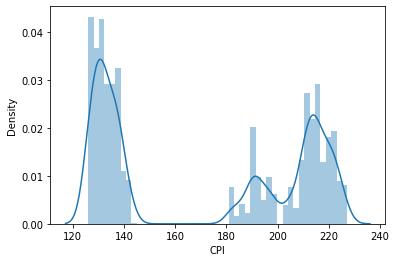

In [18]:
sns.distplot(data_train['CPI'])

<h4>The distribution of CPI has multiple peaks which shows that it shouldn't have much correlation with Weekly Sales which has a skewed distribution</h4>

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

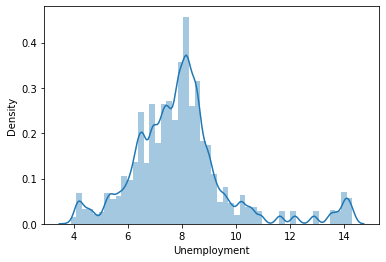

In [19]:
sns.distplot(data_train['Unemployment'])

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

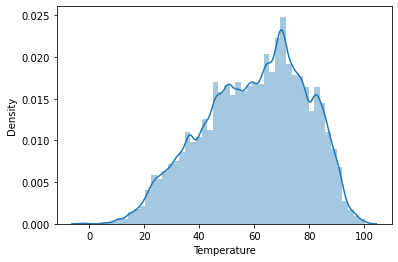

In [20]:
sns.distplot(data_train['Temperature'])

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

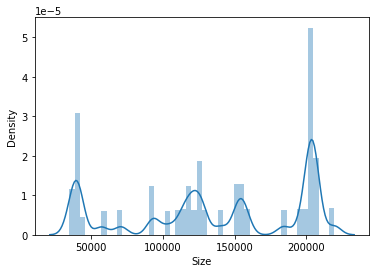

In [21]:
sns.distplot(data_train['Size'])

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

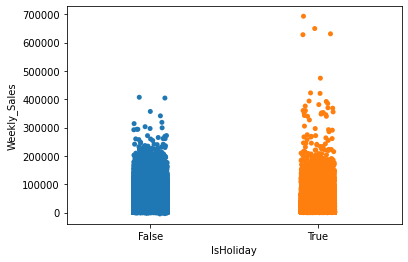

In [22]:
#checking weekly sales effect on holidays
sns.stripplot(x = data_train['IsHoliday'], y = data_train['Weekly_Sales'])

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

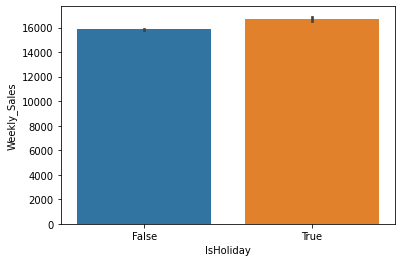

In [23]:
sns.barplot(x = data_train['IsHoliday'], y = data_train['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

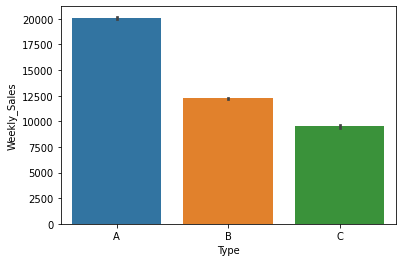

In [24]:
#checking weekly sales depending upon the type of store
sns.barplot(x = data_train['Type'], y = data_train['Weekly_Sales'])

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

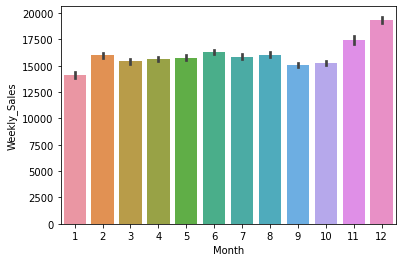

In [25]:
sns.barplot(x = data_train['Month'], y = data_train['Weekly_Sales'])

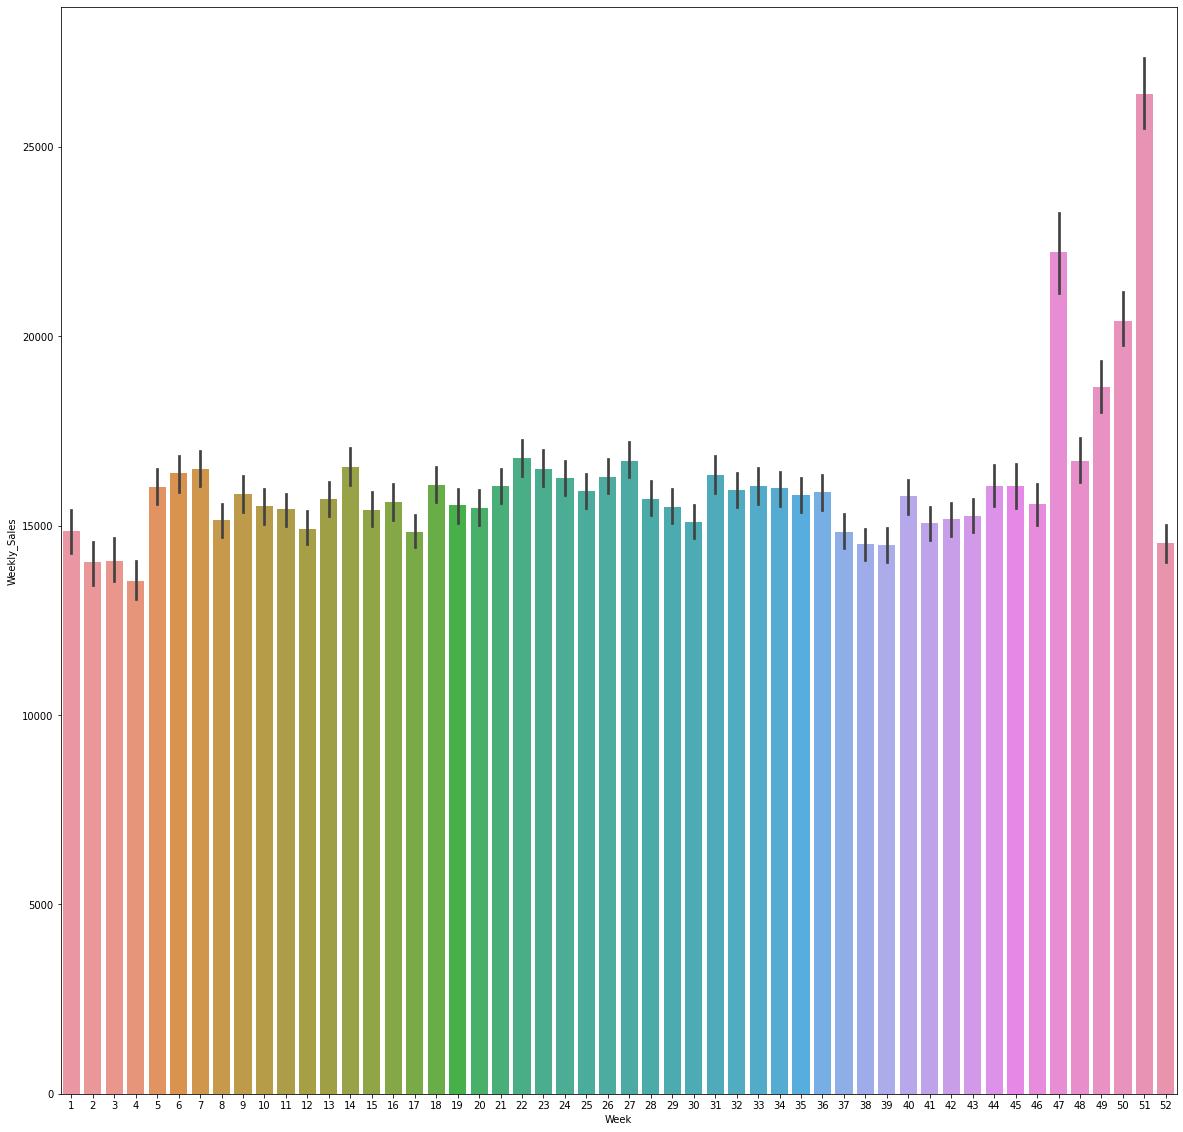

In [26]:
figweek = plt.figure(figsize = (20,20))
sns.barplot(x= data_train['Week'], y = data_train['Weekly_Sales'])
plt.show()

<h4>From the above plot we can intuitively think of decision tree like modelling with week of the year as a feature</h4>

<h4> Running the above cell multiple times we consistently get a p-value lower than the critical value of 0.05. From this we can infer that the time series is stationary</h4>

<h2>Outlier Analysis</h2>

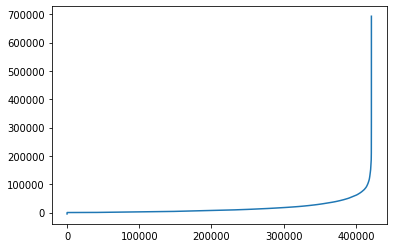

In [27]:
#Outlier Analysis
sorted_weekly_sales = np.sort(np.array(data_train["Weekly_Sales"].values))
plt.plot(np.arange(0,len(data_train["Weekly_Sales"])),sorted_weekly_sales)

<AxesSubplot:ylabel='Weekly_Sales'>

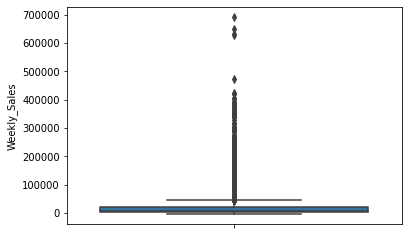

In [28]:
sns.boxplot(y="Weekly_Sales", data = data_train)

In [29]:
print("The min weekly sales present is:",data_train['Weekly_Sales'].min())
print("The max weekly sales present is:",data_train['Weekly_Sales'].max())
print("The mean of Weekly Sales is",data_train['Weekly_Sales'].mean())
for i in range(0,100,10):
    weekly_sales_temp = np.array(data_train["Weekly_Sales"].values)
    temp = np.percentile(weekly_sales_temp,i)
    print("The {0}th percentile of Weekly Sales present in the data is {1}:".format(i, temp))

The min weekly sales present is: -4988.94
The max weekly sales present is: 693099.36
The mean of Weekly Sales is 15981.25812346704
The 0th percentile of Weekly Sales present in the data is -4988.94:
The 10th percentile of Weekly Sales present in the data is 291.09700000000004:
The 20th percentile of Weekly Sales present in the data is 1340.9800000000002:
The 30th percentile of Weekly Sales present in the data is 2913.381:
The 40th percentile of Weekly Sales present in the data is 4887.96:
The 50th percentile of Weekly Sales present in the data is 7612.03:
The 60th percentile of Weekly Sales present in the data is 11274.631999999998:
The 70th percentile of Weekly Sales present in the data is 16619.324999999997:
The 80th percentile of Weekly Sales present in the data is 25217.612:
The 90th percentile of Weekly Sales present in the data is 42845.673000000046:


In [30]:
for i in range(90,100):
    weekly_sales_temp = np.array(data_train["Weekly_Sales"].values)
    temp = np.percentile(weekly_sales_temp,i)
    print("The {0}th percentile of Weekly Sales present in the data is {1}:".format(i, temp))

The 90th percentile of Weekly Sales present in the data is 42845.673000000046:
The 91th percentile of Weekly Sales present in the data is 45630.06980000002:
The 92th percentile of Weekly Sales present in the data is 48745.45440000006:
The 93th percentile of Weekly Sales present in the data is 52288.85070000007:
The 94th percentile of Weekly Sales present in the data is 56461.394400000005:
The 95th percentile of Weekly Sales present in the data is 61201.951:
The 96th percentile of Weekly Sales present in the data is 67360.3836:
The 97th percentile of Weekly Sales present in the data is 74898.70719999998:
The 98th percentile of Weekly Sales present in the data is 85371.96579999998:
The 99th percentile of Weekly Sales present in the data is 106479.58599999998:


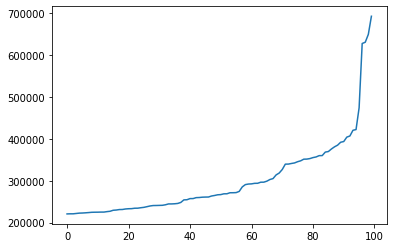

In [31]:
plt.plot(sorted_weekly_sales[-100:])
plt.show()

<AxesSubplot:ylabel='Size'>

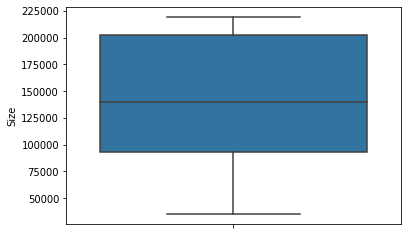

In [32]:
sns.boxplot(y = "Size", data = data_train)

<AxesSubplot:ylabel='CPI'>

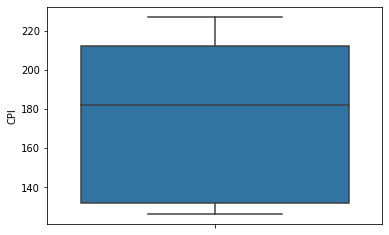

In [33]:
sns.boxplot(y = 'CPI', data = data_train)

<AxesSubplot:ylabel='Temperature'>

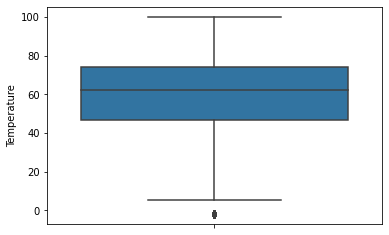

In [34]:
sns.boxplot(y = 'Temperature', data = data_train)

In [22]:
#replacement of NaN values with 0
data_train['MarkDown1']=data_train['MarkDown1'].fillna(0)
data_train['MarkDown2']=data_train['MarkDown2'].fillna(0)
data_train['MarkDown3']=data_train['MarkDown1'].fillna(0)
data_train['MarkDown4']=data_train['MarkDown1'].fillna(0)
data_train['MarkDown5']=data_train['MarkDown1'].fillna(0)


In [23]:
data_test['MarkDown1']=data_test['MarkDown1'].fillna(0)
data_test['MarkDown2']=data_test['MarkDown2'].fillna(0)
data_test['MarkDown3']=data_test['MarkDown1'].fillna(0)
data_test['MarkDown4']=data_test['MarkDown1'].fillna(0)
data_test['MarkDown5']=data_test['MarkDown1'].fillna(0)


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
type_train = encoder.fit_transform(data_train['Type'].values)
data_train['Type'] = type_train
type_test = encoder.transform(data_test['Type'].values)
data_test['Type'] = type_test
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,0,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,True,0,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,0,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,0,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,9,3,2010


In [38]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,True,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,3,2010


In [39]:
data_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,1,2012-11-02,False,0,151315,55.32,3.386,6766.44,5147.70,6766.44,6766.44,6766.44,223.462779,6.573,44,11,2012
1,1,1,2012-11-09,False,0,151315,61.24,3.314,11421.32,3370.89,11421.32,11421.32,11421.32,223.481307,6.573,45,11,2012
2,1,1,2012-11-16,False,0,151315,52.92,3.252,9696.28,292.10,9696.28,9696.28,9696.28,223.512911,6.573,46,11,2012
3,1,1,2012-11-23,True,0,151315,56.23,3.211,883.59,4.17,883.59,883.59,883.59,223.561947,6.573,47,11,2012
4,1,1,2012-11-30,False,0,151315,52.34,3.207,2460.03,0.00,2460.03,2460.03,2460.03,223.610984,6.573,48,11,2012


In [40]:
data_train['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

x = data_train[['Store','Dept','IsHoliday', 'Type', 'Size','Week', 'Temperature', 'Fuel_Price', 'Unemployment', 'Month', 'Year']]
y = data_train['Weekly_Sales']
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35)


In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [44]:
model = RandomForestRegressor(n_estimators = 50, max_depth = 50)
model.fit(X_train,y_train)



RandomForestRegressor(max_depth=50, n_estimators=50)

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

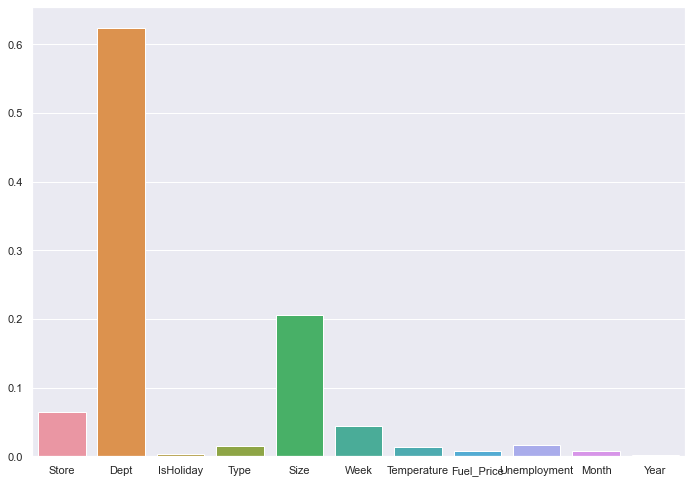

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
x_axis = ['Store','Dept', 'IsHoliday', 'Type', 'Size','Week', 'Temperature', 'Fuel_Price', 'Unemployment', 'Month', 'Year']
sns.barplot(x_axis, model.feature_importances_)

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

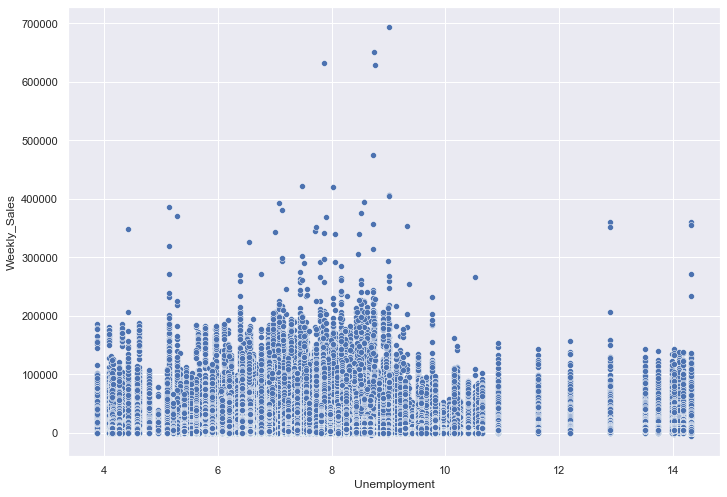

In [46]:
#further EDA on fuel price, unemployment and temperature
sns.scatterplot(data_train['Unemployment'], data_train['Weekly_Sales'])

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

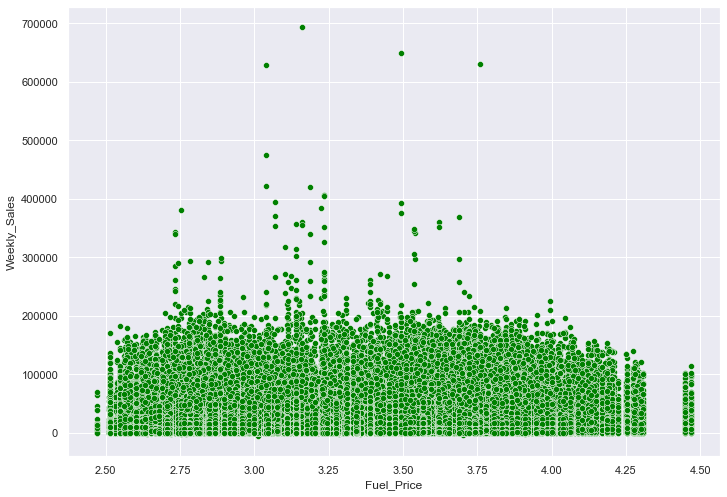

In [47]:
sns.scatterplot(data_train['Fuel_Price'], data_train['Weekly_Sales'], color = 'green')

C:\Users\This PC\anaconda3\envs\tf-2.0.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

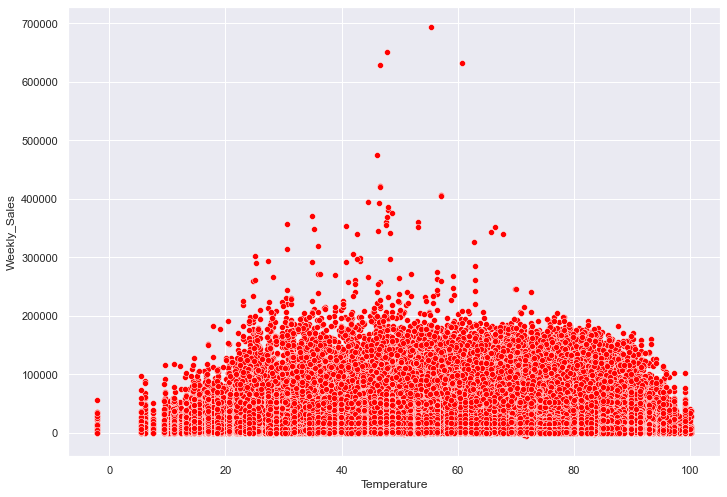

In [48]:
sns.scatterplot(data_train['Temperature'], data_train['Weekly_Sales'], color ='red')

In [49]:
print("The skewness in unemployment is", data_train['Unemployment'].skew())
print("The skewness in Temperature is", data_train['Temperature'].skew())
print("The skewness in Fuel Price is", data_train['Fuel_Price'].skew())

The skewness in unemployment is 1.1837425684974319
The skewness in Temperature is -0.3214041519699762
The skewness in Fuel Price is -0.10490149562840598


Since skewness of Unemployment is more than 1 we will not include it in our future experiments with the data

In [24]:
from sklearn.model_selection import train_test_split

x = data_train[['Store','Dept','IsHoliday', 'Type', 'Size','Week','Year']]
y = data_train['Weekly_Sales']
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35)

In [25]:
def WMAE(data,y_true, y_hat):
    weights = []
    for i in data['IsHoliday']:
        if i == True:
            weights.append(5)
        else:
            weights.append(1)
    wmae = np.sum(weights*abs(y_true-y_hat))/(np.sum(weights)) 
    return wmae

In [34]:
from sklearn.metrics import mean_absolute_error
def tunerandomforest(X_train, y_train, x_test, y_test):
    n_estimators = [40, 60, 80, 100]
    max_depth = [10,20,30,40]
    for i in n_estimators:
        for j in max_depth:
            model = RandomForestRegressor(n_estimators=i, max_depth=j)
            model.fit(X_train,y_train)
            y_hat = model.predict(x_test)
            score = WMAE(x_test,y_test, y_hat)
            print("Mean absolute error for RandomForest with n_estimators = {0} and max_depth = {1} is {2}".format(i,j, score))
  

tunerandomforest(X_train, y_train, x_test, y_test)

    

Mean absolute error for RandomForest with n_estimators = 40 and max_depth = 10 is 4269.419945260235
Mean absolute error for RandomForest with n_estimators = 40 and max_depth = 20 is 1618.1623385368555
Mean absolute error for RandomForest with n_estimators = 40 and max_depth = 30 is 1565.5609184104555
Mean absolute error for RandomForest with n_estimators = 40 and max_depth = 40 is 1570.9029032436504
Mean absolute error for RandomForest with n_estimators = 60 and max_depth = 10 is 4287.145645581851
Mean absolute error for RandomForest with n_estimators = 60 and max_depth = 20 is 1611.3883570136056
Mean absolute error for RandomForest with n_estimators = 60 and max_depth = 30 is 1559.6609634102344
Mean absolute error for RandomForest with n_estimators = 60 and max_depth = 40 is 1564.7855805934498
Mean absolute error for RandomForest with n_estimators = 80 and max_depth = 10 is 4263.202790872161
Mean absolute error for RandomForest with n_estimators = 80 and max_depth = 20 is 1610.2268873

In [35]:
def tunerandomforest_3(X_train, y_train, x_test, y_test):
    n_estimators = [100, 110, 120]
    max_depth = [30, 35, 40, 50]
    for i in n_estimators:
        for j in max_depth:
            model = RandomForestRegressor(n_estimators=i, max_depth=j)
            model.fit(X_train,y_train)
            y_hat = model.predict(x_test)
            mae = WMAE(x_test,y_test, y_hat)
            print("Mean absolute error for RandomForest with n_estimators = {0} and max_depth = {1} is {2}".format(i,j, mae))

tunerandomforest_3(X_train, y_train, x_test, y_test)

  


Mean absolute error for RandomForest with n_estimators = 100 and max_depth = 30 is 1556.4106796704696
Mean absolute error for RandomForest with n_estimators = 100 and max_depth = 35 is 1558.4559535979665
Mean absolute error for RandomForest with n_estimators = 100 and max_depth = 40 is 1559.3116438350246
Mean absolute error for RandomForest with n_estimators = 100 and max_depth = 50 is 1556.4517139299533
Mean absolute error for RandomForest with n_estimators = 110 and max_depth = 30 is 1555.4315520011178
Mean absolute error for RandomForest with n_estimators = 110 and max_depth = 35 is 1559.5616705010236
Mean absolute error for RandomForest with n_estimators = 110 and max_depth = 40 is 1558.1539563267193
Mean absolute error for RandomForest with n_estimators = 110 and max_depth = 50 is 1558.7412779217848
Mean absolute error for RandomForest with n_estimators = 120 and max_depth = 30 is 1555.8087470812268
Mean absolute error for RandomForest with n_estimators = 120 and max_depth = 35 is

In [47]:
def tunerandomforest_1(X_train,y_train,x_test,y_test):
    max_features = [2,4,6,7]
    min_samples_split = [2,3,4]
    for i in max_features:
        for j in min_samples_split:
            model = RandomForestRegressor(n_estimators=100, max_depth = 30, max_features = i, min_samples_split = j)
            model.fit(X_train, y_train)
            y_hat = model.predict(x_test)
            mse = mean_absolute_error(y_test,y_hat)
            print("Mean absolute error for RandomForest with max_features = {0} and min_samples_split = {1} is {2}".format(i,j, mse))

tunerandomforest_1(X_train, y_train, x_test, y_test)

Mean absolute error for RandomForest with max_features = 2 and min_samples_split = 2 is 3788.262450319224
Mean absolute error for RandomForest with max_features = 2 and min_samples_split = 3 is 3627.393008628459
Mean absolute error for RandomForest with max_features = 2 and min_samples_split = 4 is 3812.8374870628254
Mean absolute error for RandomForest with max_features = 4 and min_samples_split = 2 is 1573.8642306278368
Mean absolute error for RandomForest with max_features = 4 and min_samples_split = 3 is 1580.8387642279104
Mean absolute error for RandomForest with max_features = 4 and min_samples_split = 4 is 1572.1452102475728
Mean absolute error for RandomForest with max_features = 6 and min_samples_split = 2 is 1390.9997362424901
Mean absolute error for RandomForest with max_features = 6 and min_samples_split = 3 is 1390.2866934702517
Mean absolute error for RandomForest with max_features = 6 and min_samples_split = 4 is 1391.6946200207533
Mean absolute error for RandomForest wi

In [26]:
def tunerandomforest_2(X_train,y_train,x_test,y_test):
    min_samples_leaf = [1,2,3,4,5]
    for i in min_samples_leaf:
        model = RandomForestRegressor(n_estimators=100, max_depth = 30, max_features = 6, min_samples_split = 3, min_samples_leaf=i)
        model.fit(X_train,y_train)
        y_hat = model.predict(x_test)
        mse = mean_absolute_error(y_test,y_hat)
        print("Mean absolute error for RandomForest with min_samples_leaf = {0} is {1}".format(i, mse))

tunerandomforest_2(X_train,y_train, x_test, y_test)

Mean absolute error for RandomForest with min_samples_leaf = 1 is 1388.049869915867
Mean absolute error for RandomForest with min_samples_leaf = 2 is 1413.0076149719057
Mean absolute error for RandomForest with min_samples_leaf = 3 is 1448.7688201965243
Mean absolute error for RandomForest with min_samples_leaf = 4 is 1487.768776622942
Mean absolute error for RandomForest with min_samples_leaf = 5 is 1521.9243940906708


In [27]:
data_exp = data_train[['Store','Dept','IsHoliday', 'Type', 'Size','Week', 'Year']]
y_exp = data_train['Weekly_Sales']

In [28]:
model_randomforest = RandomForestRegressor(n_estimators=100, max_depth = 30, max_features = 6, min_samples_split = 3, min_samples_leaf=1)
model_randomforest.fit(data_exp,y_exp)

RandomForestRegressor(max_depth=30, max_features=6, min_samples_split=3)

In [29]:
submit_test = data_test[['Store','Dept','IsHoliday', 'Type', 'Size','Week', 'Year']]
y_hat_rf = model_randomforest.predict(submit_test)




In [32]:
def tune_xgb(X_train, y_train, x_test, y_test):
    max_depth = [6,10,14,20]
    min_child = [4, 6, 8]
    for i in max_depth:
        for j in min_child:
            model = XGBRegressor(max_depth = i, min_child_weight = j)
            model.fit(X_train, y_train)
            y_hat = model.predict(x_test)
            mae = WMAE(x_test,y_test, y_hat)
            print("Mean absolute error for max_depth {0} and min_child_weight {1} is{2}".format(i,j, mae))


tune_xgb(X_train, y_train, x_test, y_test)

Mean absolute error for max_depth 6 and min_child_weight 4 is3124.27343754773
Mean absolute error for max_depth 6 and min_child_weight 6 is3105.164119250289
Mean absolute error for max_depth 6 and min_child_weight 8 is3115.222994054628
Mean absolute error for max_depth 10 and min_child_weight 4 is1608.3084856314533
Mean absolute error for max_depth 10 and min_child_weight 6 is1634.2656497376033
Mean absolute error for max_depth 10 and min_child_weight 8 is1637.2660411286201
Mean absolute error for max_depth 14 and min_child_weight 4 is1344.2043801771763
Mean absolute error for max_depth 14 and min_child_weight 6 is1342.0521695049547
Mean absolute error for max_depth 14 and min_child_weight 8 is1362.467871635469
Mean absolute error for max_depth 20 and min_child_weight 4 is1356.1862655362293
Mean absolute error for max_depth 20 and min_child_weight 6 is1358.6384203331397
Mean absolute error for max_depth 20 and min_child_weight 8 is1355.3290664265405


In [33]:
def tune_xgb(X_train, y_train, x_test, y_test):
    max_depth = [14, 16, 18, 20]
    min_child = [4, 6, 8]
    for i in max_depth:
        for j in min_child:
            model = XGBRegressor(max_depth = i, min_child_weight = j)
            model.fit(X_train, y_train)
            y_hat = model.predict(x_test)
            mae = WMAE(x_test,y_test, y_hat)
            print("Mean absolute error for max_depth {0} and min_child_weight {1} is{2}".format(i,j, mae))


tune_xgb(X_train, y_train, x_test, y_test)

Mean absolute error for max_depth 14 and min_child_weight 4 is1344.2043801771763
Mean absolute error for max_depth 14 and min_child_weight 6 is1342.0521695049547
Mean absolute error for max_depth 14 and min_child_weight 8 is1362.467871635469
Mean absolute error for max_depth 16 and min_child_weight 4 is1316.9155309216999
Mean absolute error for max_depth 16 and min_child_weight 6 is1328.7049441995516
Mean absolute error for max_depth 16 and min_child_weight 8 is1341.9403378993782
Mean absolute error for max_depth 18 and min_child_weight 4 is1342.655592466034
Mean absolute error for max_depth 18 and min_child_weight 6 is1340.5408638712347
Mean absolute error for max_depth 18 and min_child_weight 8 is1350.8137659418617
Mean absolute error for max_depth 20 and min_child_weight 4 is1356.1862655362293
Mean absolute error for max_depth 20 and min_child_weight 6 is1358.6384203331397
Mean absolute error for max_depth 20 and min_child_weight 8 is1355.3290664265405


In [35]:
def tune_xgb_1(X_train, y_train, x_test, y_test):
    subsample = [0.6,0.75,0.85,0.9]
    colsample_bytree = [0.6, 0.75, 0.80, 0.9]
    for i in subsample:
        for j in colsample_bytree:
            model =  XGBRegressor(max_depth = 16, min_child_weight = 4, subsample = i, colsample_bytree = j)
            model.fit(X_train, y_train)
            y_hat = model.predict(x_test)
            mse = WMAE(x_test,y_test, y_hat)
            print("Mean absolute error for XGBRegressor for subsample = {0} and colsample_bytree = {1} is {2}".format(i,j,mse))

tune_xgb_1(X_train,y_train, x_test, y_test)

Mean absolute error for XGBRegressor for subsample = 0.6 and colsample_bytree = 0.6 is 1616.3078389565067
Mean absolute error for XGBRegressor for subsample = 0.6 and colsample_bytree = 0.75 is 1482.1287643742173
Mean absolute error for XGBRegressor for subsample = 0.6 and colsample_bytree = 0.8 is 1482.1287643742173
Mean absolute error for XGBRegressor for subsample = 0.6 and colsample_bytree = 0.9 is 1486.8463351389137
Mean absolute error for XGBRegressor for subsample = 0.75 and colsample_bytree = 0.6 is 1572.0475621701203
Mean absolute error for XGBRegressor for subsample = 0.75 and colsample_bytree = 0.75 is 1426.5143819877153
Mean absolute error for XGBRegressor for subsample = 0.75 and colsample_bytree = 0.8 is 1426.5143819877153
Mean absolute error for XGBRegressor for subsample = 0.75 and colsample_bytree = 0.9 is 1417.9920250050163
Mean absolute error for XGBRegressor for subsample = 0.85 and colsample_bytree = 0.6 is 1537.0016158222124
Mean absolute error for XGBRegressor fo

In [36]:
def tunexgb5(X_train, y_train, x_test, y_test):
    n_estimators =[60,80,100, 120, 140]
    for i in n_estimators:
        model = XGBRegressor(eta = 0.4, max_depth = 16, min_child_weight = 4, n_estimators = i)
        model.fit(X_train, y_train)
        y_hat = model.predict(x_test)
        score = WMAE(x_test, y_test, y_hat)
        print("WMAE for n_estimators = {0} is {1}" .format(i,score))

tunexgb5(X_train, y_train, x_test, y_test)

WMAE for n_estimators = 60 is 1367.3734649983287
WMAE for n_estimators = 80 is 1370.9752651330389
WMAE for n_estimators = 100 is 1378.6963126248788
WMAE for n_estimators = 120 is 1385.0619055744064
WMAE for n_estimators = 140 is 1391.4888764758205


In [37]:
model_xgb = XGBRegressor(max_depth = 16, min_child_weight = 4, n_estimators = 100, eta = 0.35)
model_xgb.fit(data_exp,y_exp)




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.35, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.349999994, max_delta_step=0, max_depth=16,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_hat_xgb = model_xgb.predict(submit_test)
y_hat_ensemble = (y_hat_rf + y_hat_xgb)/2
sample_submission['Weekly_Sales'] = y_hat_ensemble
sample_submission.to_csv('final_sub.csv', index = False)